# Introduction to Problem Statement

SafeTravel Inc. is one of the world's largest insurance companies specializing in travel insurance. During travel, there are a lot of risk factors - loss of baggage, airline cancellations, health issues etc. The potential customers are travellers who want to insure themselves against travel-related risks. They have different product offerings like 1-way travel insurance, 2-way insurance, insurance against cancellations and so on. They receive thousands of claims spread across different products.

Wrongly denying a genuine claim could lead to lawsuits against the company and approving the wrong claim would lead to a loss. Automatically predicting the claims could lead to a lot of benefits and solve some other supplementary problems too. As a team of data scientists consulting for SafeTravel Inc, you are now responsible for meeting their business outcomes.

## 1. Problem Description
Insurance companies take risks over customers. Risk management is a very important aspect of the insurance industry. Insurers consider every quantifiable factor to develop profiles of high and low insurance risks. Insurers collect vast amounts of information about policyholders and analyze the data.

As a Data scientist in an insurance company, you need to analyze the available data and predict whether to sanction the insurance or not.

## 2. Importing the dataset

In [1]:
import pandas as pd
import numpy as np

#visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 

#machine learning
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score,classification_report,roc_auc_score,r2_score

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pandas as pd
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


import warnings
warnings.filterwarnings("ignore")

In [2]:
train_data= pd.read_csv("file\\train.csv")
train_data.head()

,ID,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,3433,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,7,MALAYSIA,0.0,17.82,NaN,31
1,4339,EPX,Travel Agency,Online,Cancellation Plan,0,85,SINGAPORE,69.0,0.00,NaN,36
2,34590,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,11,MALAYSIA,19.8,11.88,NaN,75
3,55816,EPX,Travel Agency,Online,2 way Comprehensive Plan,0,16,INDONESIA,20.0,0.00,NaN,32
4,13816,EPX,Travel Agency,Online,Cancellation Plan,0,10,"KOREA, REPUBLIC OF",15.0,0.00,NaN,29


## Feature description

Features within the dataset are as follows:

1. ID-> Unique ID
2. Agency-> Name of the agency
3. Agency Type-> Type of Travel insurance agency
4. Distribution Channel-> Distribution channel of travel insurance agency
5. Product Name-> Name of the travel insurance products 
6. Duration-> Duration of travel 
7. Destination-> Destination of travel 
8. Net Sales-> Amount of sales of travel insurance policies 
9. Commission (in value)-> The commission received for travel insurance agency 
10. Gender-> Gender of insured 
11. Age-> Age of insured 
12. Claim (Target)

#### We have to predict-> Target: Claim Status (Claim) where '1' means 'Insurance is sanctioned' and '0' means 'Not sanctioned'

## 3. Discovering the data

In [44]:
train_data.shape  # Training set has 50,553 customer records and 12 Features including claim

(50553, 12)

In [45]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50553 entries, 0 to 50552
Data columns (total 12 columns):
ID                      50553 non-null int64
Agency                  50553 non-null object
Agency Type             50553 non-null object
Distribution Channel    50553 non-null object
Product Name            50553 non-null object
Claim                   50553 non-null int64
Duration                50553 non-null int64
Destination             50553 non-null object
Net Sales               50553 non-null float64
Commision (in value)    50553 non-null float64
Gender                  14600 non-null object
Age                     50553 non-null int64
dtypes: float64(2), int64(4), object(6)
memory usage: 4.6+ MB


There are 4 numerical and 7 caetgorical features

In [23]:
train_data.describe(include='all')

,ID,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
count,50553.000000,50553,50553,50553,50553,50553.000000,50553.000000,50553,50553.000000,50553.00000,14600,50553.000000
unique,NaN,16,2,2,25,NaN,NaN,102,NaN,NaN,2,NaN
top,NaN,EPX,Travel Agency,Online,Cancellation Plan,NaN,NaN,SINGAPORE,NaN,NaN,M,NaN
freq,NaN,28002,36575,49665,14872,NaN,NaN,10608,NaN,NaN,7527,NaN
mean,31679.740134,NaN,NaN,NaN,NaN,0.014658,49.425969,NaN,40.800977,9.83809,NaN,40.011236
std,18288.265350,NaN,NaN,NaN,NaN,0.120180,101.434647,NaN,48.899683,19.91004,NaN,14.076566
min,0.000000,NaN,NaN,NaN,NaN,0.000000,-2.000000,NaN,-389.000000,0.00000,NaN,0.000000
25%,15891.000000,NaN,NaN,NaN,NaN,0.000000,9.000000,NaN,18.000000,0.00000,NaN,35.000000
50%,31657.000000,NaN,NaN,NaN,NaN,0.000000,22.000000,NaN,26.500000,0.00000,NaN,36.000000
75%,47547.000000,NaN,NaN,NaN,NaN,0.000000,53.000000,NaN,48.000000,11.55000,NaN,44.000000


In [24]:
train_data[train_data['Age']>=100]['Claim'].value_counts()

0    786
1      9
Name: Claim, dtype: int64

In [25]:
train_data[train_data['Duration']<0]['Claim'].value_counts()

0    3
Name: Claim, dtype: int64

In [26]:
train_data[(train_data['Net Sales']<=0) & (train_data['Commision (in value)'] >0)]

,ID,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,3433,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,7,MALAYSIA,0.0,17.82,NaN,31
6,9921,JZI,Airlines,Online,Value Plan,0,23,JAPAN,-69.0,24.15,F,26
19,3623,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,140,SPAIN,0.0,23.76,NaN,31
53,7966,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,28,NORWAY,0.0,41.58,NaN,58
173,9932,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,198,NETHERLANDS,-9.9,5.94,NaN,31
192,62251,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,307,NEW ZEALAND,0.0,47.52,NaN,55
207,10591,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,166,ICELAND,0.0,65.34,NaN,42
232,17060,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,11,AUSTRALIA,0.0,35.64,NaN,41
317,51324,JZI,Airlines,Online,Value Plan,0,7,INDONESIA,0.0,9.10,F,39
336,28541,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,109,AUSTRALIA,-19.8,11.88,NaN,31


In [7]:
df_Net= train_data['Net Sales']<train_data['Commision (in value)']
df_Net.sum()

1598

On analyzing the data above using describe, null check & getting dataset info, we conclude the following:

1. Gender has too many Null values 
2. Duration has value as '-2' 
3. Age-> Maximum age is 118 (795 customers have age greater & equal to 100)
4. Net Sales is in negative (-389)


So, there is huge amount of Gender data missing for 14,600 customers in total (71 % value is missing). Rest all of the features do not have missing data.

## 4. Data Vistualization

#### a) Checking the missing values

In [8]:
!pip install missingno

In [9]:
import missingno as msno

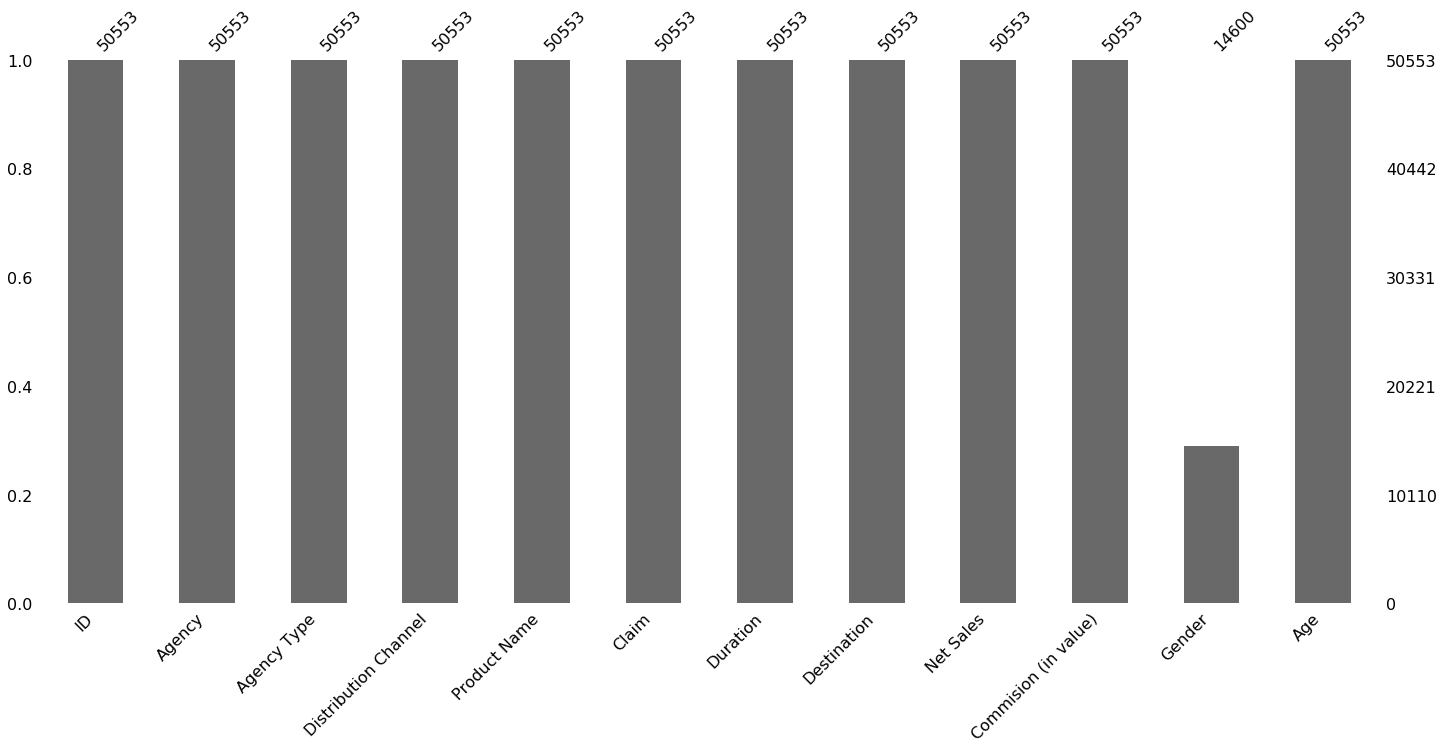

In [10]:
msno.bar(train_data)

#### b) Checking the outliers if any in the data set

In [11]:
numerical = train_data.select_dtypes(include = np.number)
numerical.head()

,ID,Claim,Duration,Net Sales,Commision (in value),Age
0,3433,0,7,0.0,17.82,31
1,4339,0,85,69.0,0.00,36
2,34590,0,11,19.8,11.88,75
3,55816,0,16,20.0,0.00,32
4,13816,0,10,15.0,0.00,29


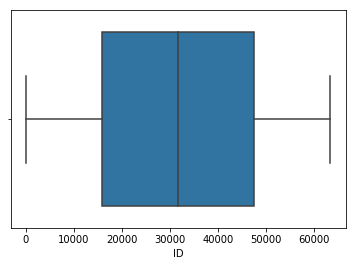

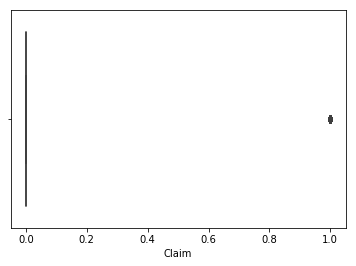

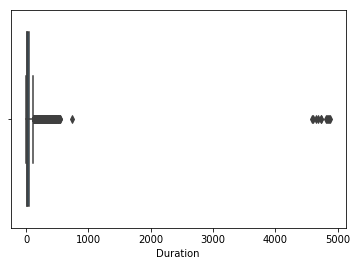

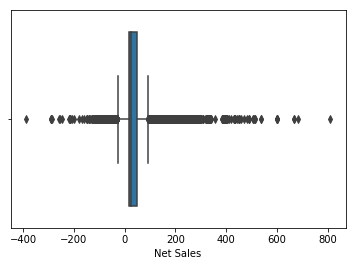

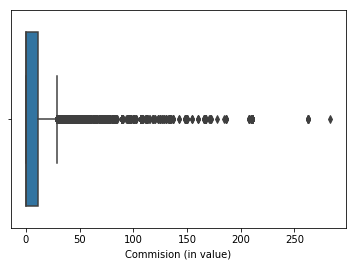

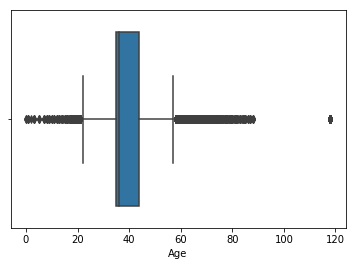

In [117]:
# Distribution of data across numerical features
for x in numerical:
    plt.figure()
    sns.boxplot(x= train_data[x])

#### c) Checking distribution of data 

In [118]:
categorical = train_data.select_dtypes(exclude = np.number)
categorical.head()

,Agency,Agency Type,Distribution Channel,Product Name,Destination,Gender
0,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,MALAYSIA,NaN
1,EPX,Travel Agency,Online,Cancellation Plan,SINGAPORE,NaN
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,MALAYSIA,NaN
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,INDONESIA,NaN
4,EPX,Travel Agency,Online,Cancellation Plan,"KOREA, REPUBLIC OF",NaN


In [119]:
numerical= train_data.select_dtypes(include = np.number)
numerical.head()

,ID,Claim,Duration,Net Sales,Commision (in value),Age
0,3433,0,7,0.0,17.82,31
1,4339,0,85,69.0,0.00,36
2,34590,0,11,19.8,11.88,75
3,55816,0,16,20.0,0.00,32
4,13816,0,10,15.0,0.00,29


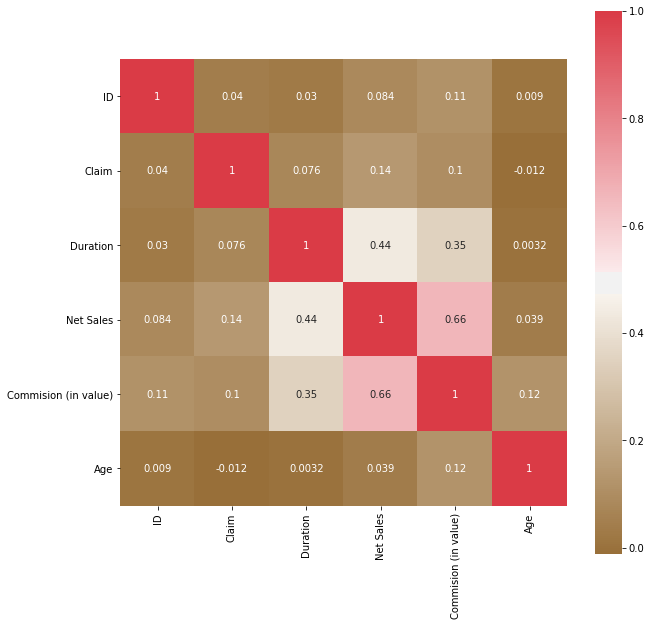

In [120]:
f, ax = plt.subplots(figsize = (10, 10))
corr = numerical.corr()
sns.heatmap(corr,annot = True, mask = np.zeros_like(corr, dtype = np.bool),
          cmap = sns.diverging_palette(50, 10, as_cmap = True), square = True, ax = ax)

From the above heatmap, we can observe that there is very less corr between columns except "Commission" and "Net Sale"
which is "0.66" but this we can treat as independent

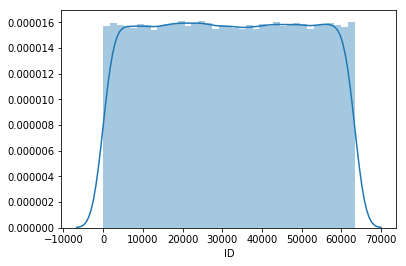

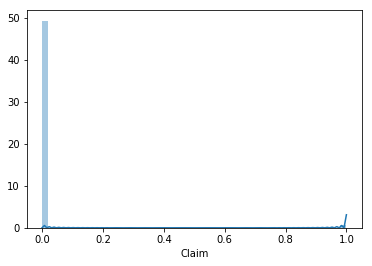

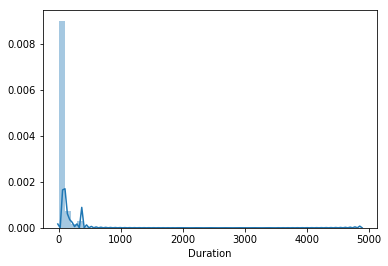

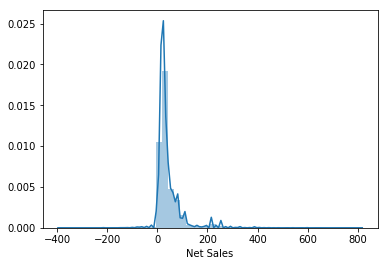

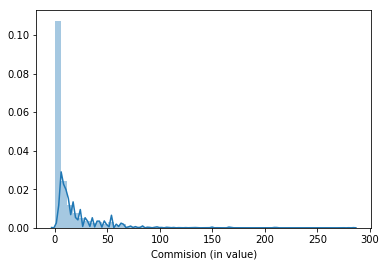

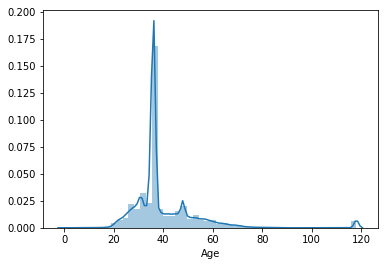

In [121]:
for i, col in enumerate(numerical.columns):
    plt.figure(i)
    sns.distplot(numerical[col])

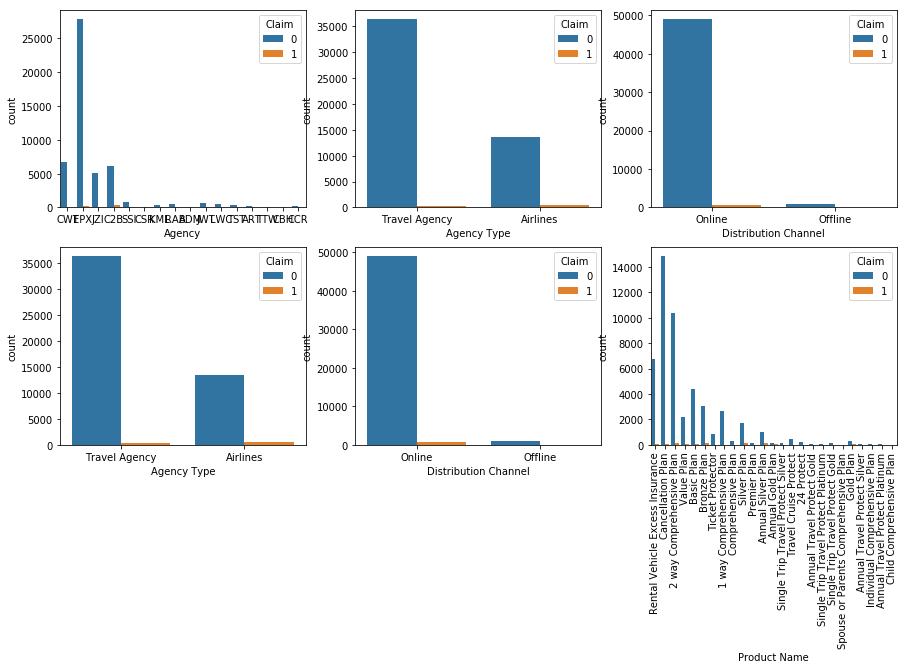

In [112]:
# This is the distribution of data across categorical features
categorical = train_data.select_dtypes(exclude = np.number)
cols = list(categorical)
fig , ax = plt.subplots(2,3,figsize =(15,8))
for i in range(2):
    for j in range(3):
        sns.countplot(cols[i+j], hue= 'Claim', data = train_data,ax=ax[i][j])
plt.xticks(rotation=90)
plt.show()

Hence, from the graph, we can conclude:

Duration: Data in this column is highly right skewed.

Net Sales and Commison: These both column seems to related but the graph plot shows disparency as low net sales shows high commison which is not pratically possible.

Age: Age is random so its distribution can be random.

In [122]:
a = train_data
a['Age'] = a['Age'].mask(a['Age'] <= 20, 1)
a['Age'] = a['Age'].mask(
    (a['Age'] >= 21) & (a['Age'] <= 30), 2)
a['Age'] = a['Age'].mask(
    (a['Age'] >= 31) & (a['Age'] <= 40), 3)
a['Age'] = a['Age'].mask(
    (a['Age'] >= 41) & (a['Age'] <= 50), 4)
a['Age'] = a['Age'].mask(
    (a['Age'] >= 51) & (a['Age'] <= 99), 5)
a['Age'] = a['Age'].mask(a['Age'] >= 100, 6)
unique, counts = np.unique(a.Age, return_counts=True)

### How old are our customers?

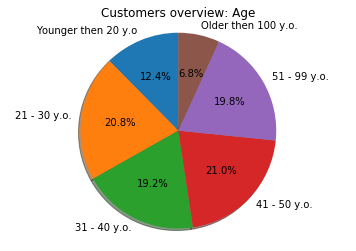

In [123]:
labels = 'Younger then 20 y.o', '21 - 30 y.o.', '31 - 40 y.o.', '41 - 50 y.o.', '51 - 99 y.o.', 'Older then 100 y.o.'
sizes = [166, 278, 257, 281, 265, 91]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.title('Customers overview: Age')
plt.show()

## 5. EDA on dataset

In [3]:
def applyingEDA(df):
    # Replacing 'Null values' with another category
    df.drop('Gender',1,inplace=True)
    
    # Replacing with mean value of Age for records with Age=118
    age_mean = int(df['Age'].mean())
    df['Age'].replace(118,age_mean,inplace=True)
    
    df.loc[df['Net Sales'] == 0.0, 'Commision (in value)'] = 0
    
    # Replacing Duration lesser than zero with mean value
    duration_mean = int(df['Duration'].mean())
    df['Duration'].replace(0,duration_mean,inplace=True)
    df['Duration'].replace(-1,duration_mean,inplace=True)
    df['Duration'].replace(-2,duration_mean,inplace=True)
    return df

In [4]:
(train_data['Age']> 100).sum()

795

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50553 entries, 0 to 50552
Data columns (total 12 columns):
ID                      50553 non-null int64
Agency                  50553 non-null object
Agency Type             50553 non-null object
Distribution Channel    50553 non-null object
Product Name            50553 non-null object
Claim                   50553 non-null int64
Duration                50553 non-null int64
Destination             50553 non-null object
Net Sales               50553 non-null float64
Commision (in value)    50553 non-null float64
Gender                  14600 non-null object
Age                     50553 non-null int64
dtypes: float64(2), int64(4), object(6)
memory usage: 4.6+ MB


In [6]:
# get count of data having net sales = 0 & comission >0
train_data[(train_data['Net Sales']==0.0) & (train_data['Commision (in value)']>0)].count()

ID                      1070
Agency                  1070
Agency Type             1070
Distribution Channel    1070
Product Name            1070
Claim                   1070
Duration                1070
Destination             1070
Net Sales               1070
Commision (in value)    1070
Gender                   259
Age                     1070
dtype: int64

In [7]:
# Apply EDA
train_data = applyingEDA(train_data)

In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50553 entries, 0 to 50552
Data columns (total 11 columns):
ID                      50553 non-null int64
Agency                  50553 non-null object
Agency Type             50553 non-null object
Distribution Channel    50553 non-null object
Product Name            50553 non-null object
Claim                   50553 non-null int64
Duration                50553 non-null int64
Destination             50553 non-null object
Net Sales               50553 non-null float64
Commision (in value)    50553 non-null float64
Age                     50553 non-null int64
dtypes: float64(2), int64(4), object(5)
memory usage: 4.2+ MB


In [9]:
train_data.head()

,ID,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Age
0,3433,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,7,MALAYSIA,0.0,0.00,31
1,4339,EPX,Travel Agency,Online,Cancellation Plan,0,85,SINGAPORE,69.0,0.00,36
2,34590,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,11,MALAYSIA,19.8,11.88,75
3,55816,EPX,Travel Agency,Online,2 way Comprehensive Plan,0,16,INDONESIA,20.0,0.00,32
4,13816,EPX,Travel Agency,Online,Cancellation Plan,0,10,"KOREA, REPUBLIC OF",15.0,0.00,29


## 6. Data Preprocessing

In [10]:
def preprocessTrain(df):
    from sklearn import preprocessing
    minMax = MinMaxScaler()
    le = LabelEncoder()
    categorical = df.select_dtypes(exclude = np.number)
    one_hot_encoded_columns = pd.get_dummies(categorical)
    numerical = df.select_dtypes(include = np.number)
    numerical.drop(['ID','Claim'],1,inplace=True)
    numerical = pd.DataFrame(minMax.fit_transform(numerical), columns=list(numerical))
    df = pd.concat([numerical,one_hot_encoded_columns],1)
    return df

In [11]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50553 entries, 0 to 50552
Data columns (total 11 columns):
ID                      50553 non-null int64
Agency                  50553 non-null object
Agency Type             50553 non-null object
Distribution Channel    50553 non-null object
Product Name            50553 non-null object
Claim                   50553 non-null int64
Duration                50553 non-null int64
Destination             50553 non-null object
Net Sales               50553 non-null float64
Commision (in value)    50553 non-null float64
Age                     50553 non-null int64
dtypes: float64(2), int64(4), object(5)
memory usage: 4.2+ MB


In [12]:
# Pre Process Data
train_data_cleaned = preprocessTrain(train_data)

In [13]:
train_data_cleaned.head()

,Duration,Net Sales,Commision (in value),Age,Agency_ADM,Agency_ART,Agency_C2B,Agency_CBH,Agency_CCR,Agency_CSR,...,Destination_UGANDA,Destination_UKRAINE,Destination_UNITED ARAB EMIRATES,Destination_UNITED KINGDOM,Destination_UNITED STATES,Destination_UZBEKISTAN,Destination_VANUATU,Destination_VENEZUELA,Destination_VIET NAM,Destination_ZAMBIA
0,0.001230,0.324437,0.000000,0.352273,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.017213,0.381985,0.000000,0.409091,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.002049,0.340951,0.041905,0.852273,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.003074,0.341118,0.000000,0.363636,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.001844,0.336947,0.000000,0.329545,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
## droping un wanted columns
train_data_cleaned.drop(['Agency_JWT','Destination_ZAMBIA'],1,inplace=True)

In [15]:
X = train_data_cleaned
y = train_data['Claim']

In [16]:
y.value_counts()

0    49812
1      741
Name: Claim, dtype: int64

## APPLYING SMOTE

In [17]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
# Applying SMOTE
X_res , y_res = sm.fit_sample(X,y.ravel())
X_res.shape
pd.Series(y_res).value_counts()

1    49812
0    49812
dtype: int64

In [21]:
X.shape

(50553, 149)

## Model 1 :Applying KNN Classifier

In [147]:
# Classification Matrix 
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

from sklearn.model_selection import train_test_split as tts
X_train,X_test,y_train,y_test = tts(X_res,y_res,random_state = 42, test_size = 0.3)

from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score, auc, accuracy_score,r2_score, precision_score

knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print(knn.score(X_test,y_test))
print (classification_report(y_test,y_pred))

0.9313771413276232
              precision    recall  f1-score   support

           0       0.96      0.90      0.93     14983
           1       0.90      0.96      0.93     14905

    accuracy                           0.93     29888
   macro avg       0.93      0.93      0.93     29888
weighted avg       0.93      0.93      0.93     29888



In [148]:
precision_score(y_test,y_pred)

0.904671955673089

## Model 2 : Applying Log Reg

In [77]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=42)

from sklearn.model_selection import train_test_split as tts
X_train,X_test,y_train,y_test = tts(X_res,y_res,random_state = 42, test_size = 0.3)

from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score, auc, accuracy_score

log_reg.fit(X_train,y_train)
y_pred = log_reg.predict(X_test)
print(accuracy_score(y_test,y_pred))
print (classification_report(y_test,y_pred))

0.7805139186295503
              precision    recall  f1-score   support

           0       0.77      0.80      0.79     14983
           1       0.79      0.76      0.78     14905

    accuracy                           0.78     29888
   macro avg       0.78      0.78      0.78     29888
weighted avg       0.78      0.78      0.78     29888



In [78]:
precision_score(y_test,y_pred)

0.7915182002375463

## Model 3: Applying Log Reg with balanced

In [79]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=42,class_weight="balanced")

from sklearn.model_selection import train_test_split as tts
X_train,X_test,y_train,y_test = tts(X_res,y_res,random_state = 42, test_size = 0.3)

from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score, auc, accuracy_score

log_reg.fit(X_train,y_train)
y_pred = log_reg.predict(X_test)
print(accuracy_score(y_test,y_pred))
print (classification_report(y_test,y_pred))

0.780480460385439
              precision    recall  f1-score   support

           0       0.77      0.80      0.79     14983
           1       0.79      0.76      0.78     14905

    accuracy                           0.78     29888
   macro avg       0.78      0.78      0.78     29888
weighted avg       0.78      0.78      0.78     29888



In [80]:
precision_score(y_test,y_pred)

0.7917482517482517

## Model 4 : Applying Log Reg with Hyperparameter optimization

In [20]:
log_reg
params = {"C":np.arange(0.1,0.8,0.1), 
         "penalty":["l2", "l1"]}
log_reg_cv = GridSearchCV(log_reg, param_grid=params, cv = 10)
log_reg_cv.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=42, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]),
                         'penalty': ['l2', 'l1']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [21]:
y_pred = log_reg_cv.best_estimator_.predict(X_test)
print (log_reg_cv.best_params_)
print (accuracy_score(y_test,y_pred))
print (classification_report(y_test,y_pred))

{'C': 0.7000000000000001, 'penalty': 'l1'}
0.780580835117773
              precision    recall  f1-score   support

           0       0.77      0.80      0.79     14983
           1       0.79      0.76      0.78     14905

    accuracy                           0.78     29888
   macro avg       0.78      0.78      0.78     29888
weighted avg       0.78      0.78      0.78     29888



## Model 5 : Applying SVM

In [90]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split as tts
X_train,X_test,y_train,y_test = tts(X_res,y_res,random_state = 42, test_size = 0.3)

clf = SVC(kernel='linear')

In [91]:
clf.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [92]:
y_pred = clf.predict(X_test)
print(accuracy_score(y_test,y_pred))
print (classification_report(y_test,y_pred))
precision_score(y_test,y_pred)

0.7608404710920771
              precision    recall  f1-score   support

           0       0.73      0.82      0.78     14983
           1       0.80      0.70      0.74     14905

    accuracy                           0.76     29888
   macro avg       0.76      0.76      0.76     29888
weighted avg       0.76      0.76      0.76     29888



0.7966347992351817

### Model 5: Random Forest with no hyperparameter optmized

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score, auc, accuracy_score, precision_score

In [25]:
rfc = RandomForestClassifier(random_state=42, oob_score=True)
X_train,X_test,y_train,y_test = tts(X_res,y_res,random_state = 42, test_size = 0.3)

In [26]:
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)
print (accuracy_score(y_test,y_pred))
print (classification_report(y_test,y_pred))
print (roc_auc_score(y_test,y_pred))
print (rfc.oob_score_)

0.9656718415417559
              precision    recall  f1-score   support

           0       0.97      0.96      0.97     14983
           1       0.96      0.97      0.97     14905

    accuracy                           0.97     29888
   macro avg       0.97      0.97      0.97     29888
weighted avg       0.97      0.97      0.97     29888

0.9656738780077335
0.9490363657221521


In [28]:
precision_score(y_test,y_pred)

0.9647712812269774

### Model 6: Decision tree with hyperparameters optimized and class weights balanced

In [18]:
dtc = DecisionTreeClassifier(random_state=42)

In [21]:
X_train,X_test,y_train,y_test = tts(X_res,y_res,random_state = 42, test_size = 0.3)

In [22]:
params = {"criterion":["gini", "entropy"], 
         "max_depth":np.arange(4,8,1), 
         "min_samples_split":np.arange(0.05, 0.08, 0.01)}
dtc_cv = GridSearchCV(dtc, param_grid=params, cv = 10)
dtc_cv.fit(X_train,y_train)
y_pred = dtc_cv.best_estimator_.predict(X_test)
print (dtc_cv.best_params_)
print (accuracy_score(y_test,y_pred))
print (classification_report(y_test,y_pred))
print (roc_auc_score(y_test,y_pred))

{'criterion': 'gini', 'max_depth': 7, 'min_samples_split': 0.05}
0.7814842077087795
              precision    recall  f1-score   support

           0       0.83      0.71      0.77     14983
           1       0.75      0.85      0.79     14905

    accuracy                           0.78     29888
   macro avg       0.79      0.78      0.78     29888
weighted avg       0.79      0.78      0.78     29888

0.7816607608717141


In [23]:
# Get the preduction
precision_score(y_test,y_pred)

0.7471081208687441

# APPLYING EACH MODEL IN TEST DATA

In [93]:
test = pd.read_csv('file/test.csv')

In [94]:
# Applying EDR
test = applyingEDA(test)

In [95]:
# Pre processing test
def preprocessTest(df):
    from sklearn import preprocessing
    scaler = MinMaxScaler()
    categorical = df.select_dtypes(exclude = np.number)
    one_hot_encoded_columns = pd.get_dummies(categorical)
    numerical = df.select_dtypes(include = np.number)
    numerical.drop(['ID'],1,inplace=True)
    numerical = pd.DataFrame(scaler.fit_transform(numerical), columns=list(numerical))
    df = pd.concat([numerical,one_hot_encoded_columns],1)
    return df

In [96]:
test_cleaned = preprocessTest(test)

In [97]:
test_cleaned.shape

(12661, 154)

In [98]:
## droping un wanted columns
test_cleaned.drop(['Agency_ADM','Destination_ZAMBIA','Gender_M'],1,inplace=True)

In [100]:
y_pred = clf.predict(test_cleaned)

In [88]:
def savesubmissionfile(y_pred,df):
    d =dict(zip(list(df['ID']),list(y_pred)))
    submission =pd.DataFrame(d.items(),columns =['ID','Claim'])
    submission.set_index(drop=True,inplace=True,keys='ID')
    return submission

In [101]:
submission = savesubmissionfile(y_pred,test)

In [102]:
submission.to_csv('TheWhackHack_sub17_LogReg_Balanced.csv')

# MODEL TO BE SELECT IS WITH THE HIGHEST PRECISION SCORE :- Random Forest